# Distributions and Validation

## 1 Normal (Gaussian) Distribution and Other Common Distributions

Understanding the various types of probability distributions is crucial in statistical analysis and data science. This section covers the Normal (Gaussian) distribution and other common distributions such as the exponential and uniform distributions.


### Normal (Gaussian) Distribution
The normal distribution, also known as the Gaussian distribution, is a continuous probability distribution characterized by its bell-shaped curve. It is defined by two parameters: the mean ($\mu$) and the standard deviation ($\sigma$). The properties of the normal distribution include:

- Symmetry about the mean
- The mean, median, and mode are all equal
- Approximately 68% of the data falls within one standard deviation of the mean, 95% within two, and 99.7% within three (empirical rule)

### Why We Seek Normality in Data

1. **Statistical Methods**: Many statistical tests and methods assume normality in the data. For example, t-tests, ANOVA, and regression analysis perform optimally when the underlying data is normally distributed.
2. **Central Limit Theorem**: The central limit theorem states that the sum of a large number of independent and identically distributed random variables tends to follow a normal distribution, regardless of the original distribution of the variables. This property allows for easier application of inferential statistics.
3. **Predictive Modeling**: Machine learning algorithms, such as linear regression, assume that the residuals (errors) are normally distributed. This assumption ensures that the models have the best possible performance and validity.
4. **Interpretability**: Normal distributions provide a straightforward framework for understanding data variability and making probabilistic predictions.

**Example:**

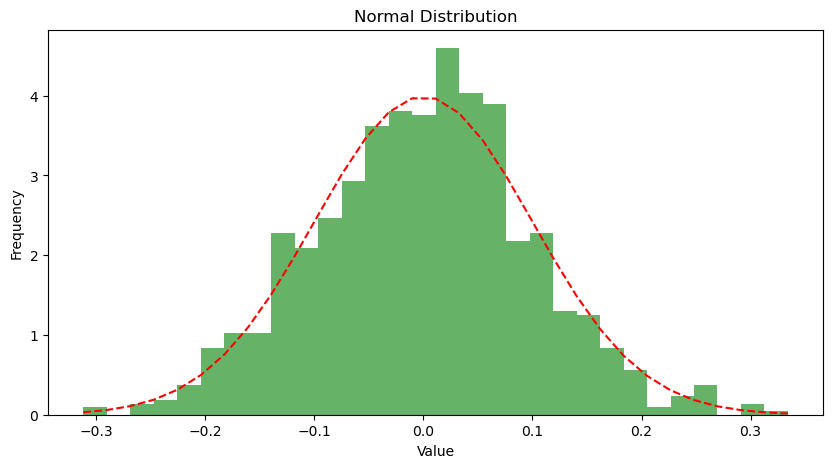

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate data for a normal distribution
mu, sigma = 0, 0.1  # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

# Plot the histogram and the probability density function (PDF)
plt.figure(figsize=(10, 5))
count, bins, ignored = plt.hist(s, 30, density=True, alpha=0.6, color='g')
plt.plot(bins, norm.pdf(bins, mu, sigma), 'r--')
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

### Exponential Distribution 

The exponential distribution is a continuous probability distribution often used to model the time between events in a Poisson process. It is defined by a single parameter, the rate $\lambda$. The properties of the exponential distribution include:

* The mean and standard deviation are both equal to $\frac{1}{\lambda}$
* It is memoryless, meaning the probability of an event occuring in the future is independent of the past

**Example:**

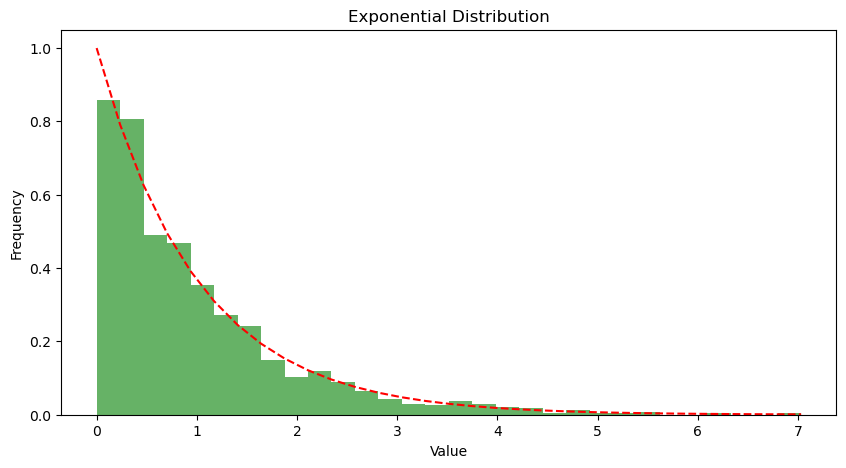

In [2]:
from scipy.stats import expon

# Generate data for an exponential distribution
lam = 1.0  # rate
s = np.random.exponential(1/lam, 1000)

# Plot the histogram and the probability density function (PDF)
plt.figure(figsize=(10, 5))
count, bins, ignored = plt.hist(s, 30, density=True, alpha=0.6, color='g')
plt.plot(bins, expon.pdf(bins, scale=1/lam), 'r--')
plt.title('Exponential Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

### Uniform Distribution 

The uniform distribution is a continuous probability distribution where all outcomes are equally likely. It is defined by two parameters: the minimum value (a) and the maximum value (b). The properties of the uniform distribution include:

* All intervals of the same length within the distribution's range are equally probable
* The mean is $\frac{(a + b)}{2}$
* The variance is $\frac{(b - a)^2}{12}$

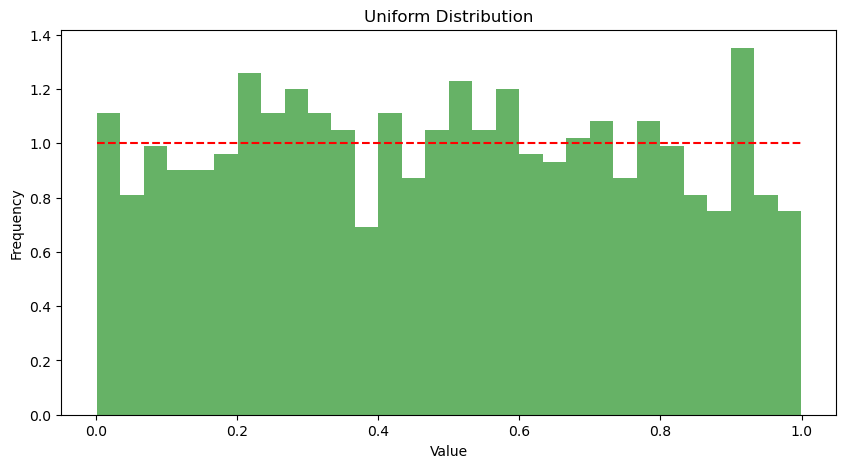

In [3]:
from scipy.stats import uniform

# Generate data for a uniform distribution
a, b = 0, 1  # range
s = np.random.uniform(a, b, 1000)

# Plot the histogram and the probability density function (PDF)
plt.figure(figsize=(10, 5))
count, bins, ignored = plt.hist(s, 30, density=True, alpha=0.6, color='g')
plt.plot(bins, uniform.pdf(bins, a, b-a), 'r--')
plt.title('Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

## 2. Validating Distributions

Validating the distribution of data is essential to ensure that the assumptions made in statistical analysis are met. Several statistical tests can be used to validate if data follows a specific distribution.

### Shapiro-Wilk Test

The Shapiro-Wilk test is a statistical test used to check the normality of a dataset. It is particularly powerful for detecting departures from normality in small sample sizes.

In [4]:
from scipy.stats import shapiro

# Generate data for a normal distribution
data = np.random.normal(0, 1, 1000)

# Perform Shapiro-Wilk test
stat, p = shapiro(data)
print('Shapiro-Wilk Test Statistics=%.3f, p-value=%.3f' % (stat, p))

# Interpret the result
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


Shapiro-Wilk Test Statistics=0.999, p-value=0.715
Sample looks Gaussian (fail to reject H0)


**Interpretation:**

* **Test Statistic (W)**: Measures how well the data matches a normal distribution. A value close to 1 indicates that the data is normally distributed.
* **p-value**: The probability that the observed data could have occurred under the null hypothesis (data is normally distributed). A low p-value **(typically less than 0.05)** indicates that the data is not normally distributed.

### Kolmogorov-Smirnov Test

The Kolmogorov-Smirnov test compares the sample distribution with a reference probability distribution (e.g., normal distribution). It is a non-parametric test and does not assume a specific distribution for the data.

In [5]:
from scipy.stats import kstest

# Perform Kolmogorov-Smirnov test
stat, p = kstest(data, 'norm')
print('Kolmogorov-Smirnov Test Statistics=%.3f, p-value=%.3f' % (stat, p))

# Interpret the result
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


Kolmogorov-Smirnov Test Statistics=0.021, p-value=0.748
Sample looks Gaussian (fail to reject H0)


**Interpretation:**

* **Test Statistic (D)**: Measures the maximum difference between the observed and reference cumulative distribution functions. A small value indicates a close match.
* **p-value**: The probability that the observed data could have occurred under the null hypothesis. A low p-value indicates that the data does not follow the reference distribution.

### Anderson-Darling Test

The Anderson-Darling test is a statistical test that checks if a sample comes from a specific distribution. It is an improvement over the Kolmogorov-Smirnov test and gives more weight to the tails of the distribution.

In [6]:
from scipy.stats import anderson

# Perform Anderson-Darling test
result = anderson(data, dist='norm')
print('Anderson-Darling Test Statistic: %.3f' % result.statistic)

# Interpret the result
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print(f'At the {sl}% level, the sample looks Gaussian (fail to reject H0)')
    else:
        print(f'At the {sl}% level, the sample does not look Gaussian (reject H0)')


Anderson-Darling Test Statistic: 0.203
At the 15.0% level, the sample looks Gaussian (fail to reject H0)
At the 10.0% level, the sample looks Gaussian (fail to reject H0)
At the 5.0% level, the sample looks Gaussian (fail to reject H0)
At the 2.5% level, the sample looks Gaussian (fail to reject H0)
At the 1.0% level, the sample looks Gaussian (fail to reject H0)


**Interpretation:**

* **Test Statistic (A2)**: Measures how well the data matches a specified distribution. A lower value indicates a better match.
* **Critical Values**: Predefined values for different significance levels (e.g., 1%, 5%, 10%). If the test statistic is greater than the critical value, the null hypothesis is rejected.

## 3. Creating and Splitting a Non-Gaussian Dataset

Sometimes, datasets do not follow a single Gaussian distribution due to the presence of multiple classes of individuals. In such cases, splitting the dataset into several groups can help achieve better Gaussian distributions within each group.

**Example**:

Let's create a dataset with multiple classes and then split it into groups to better fit Gaussian distributions.

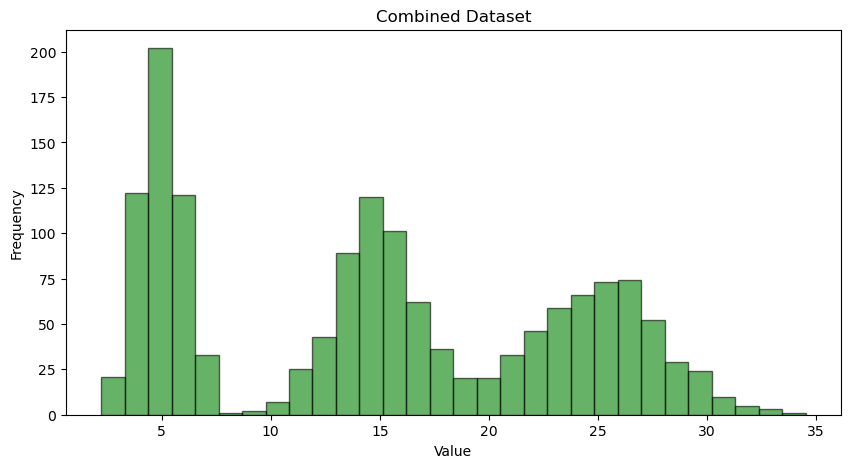

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a dataset with multiple classes
np.random.seed(0)
class_1 = np.random.normal(loc=5, scale=1, size=500)
class_2 = np.random.normal(loc=15, scale=2, size=500)
class_3 = np.random.normal(loc=25, scale=3, size=500)

data = np.concatenate([class_1, class_2, class_3])
labels = np.concatenate([np.repeat('Class 1', 500), np.repeat('Class 2', 500), np.repeat('Class 3', 500)])

df = pd.DataFrame({'Value': data, 'Class': labels})

# Plot the combined data
plt.figure(figsize=(10, 5))
plt.hist(df['Value'], bins=30, alpha=0.6, color='g', edgecolor='black')
plt.title('Combined Dataset')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

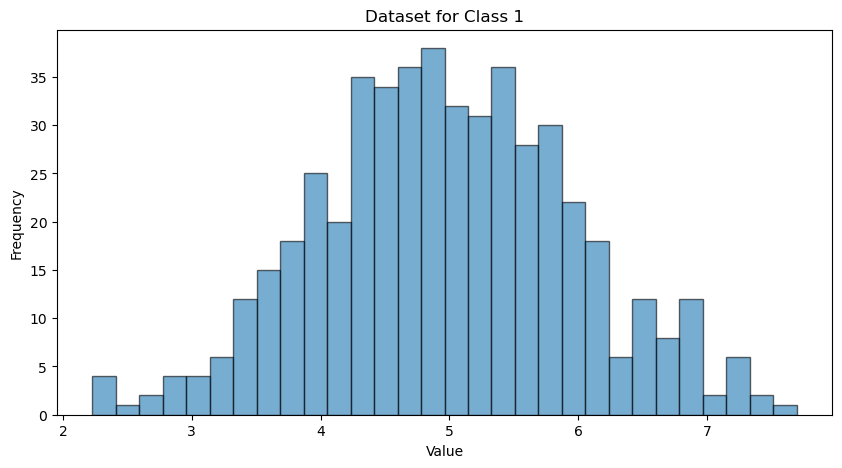

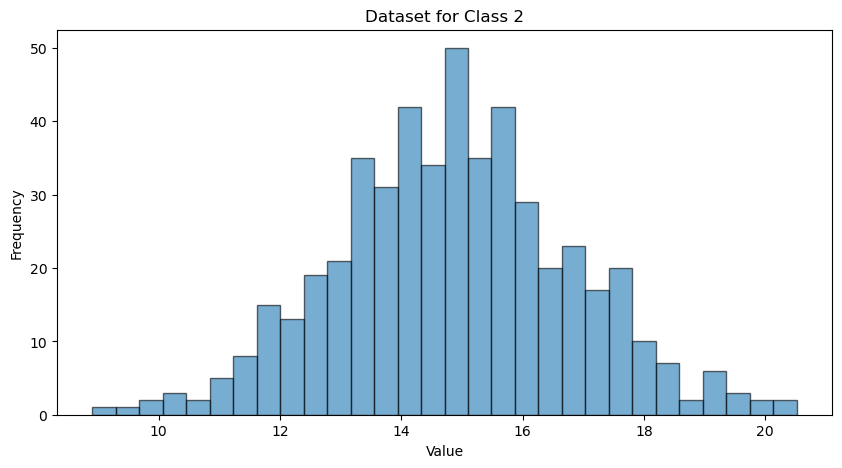

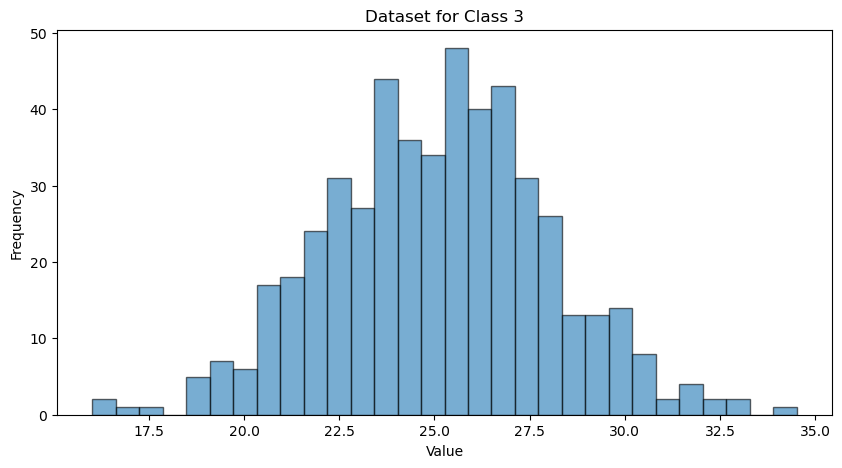

In [8]:
# Plot data by class
for class_label in df['Class'].unique():
    subset = df[df['Class'] == class_label]
    plt.figure(figsize=(10, 5))
    plt.hist(subset['Value'], bins=30, alpha=0.6, edgecolor='black')
    plt.title(f'Dataset for {class_label}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

**Real-Life Examples**

**Healthcare:**

- Scenario: Consider a dataset of patients' blood pressure readings from a general hospital.
- Issue: The overall distribution may not follow a normal distribution due to different subgroups (e.g., age groups, patients with different conditions).
- Solution: By splitting the data into age groups or by different medical conditions, each subgroup may follow a normal distribution more closely.

**Finance:**

- Scenario: A dataset of transaction amounts in a bank.
- Issue: The overall distribution may be skewed due to the presence of different types of accounts (e.g., personal, business, high-net-worth individuals).
- Solution: Separating the transactions by account type can lead to more normally distributed data within each account type.

**Education:**

- Scenario: Scores of students in a standardized test.
- Issue: The overall score distribution may not be normal due to different levels of preparation (e.g., regular students, advanced placement students).
- Solution: Splitting the data by class or preparation level may result in more normal distributions.